In [119]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
import scipy.sparse as sp
%matplotlib inline

In [120]:
#User-Item-Rating
#Para obter esse csv, é necessário rodar o script json_to_csv_coverter.py
# $ python json_to_csv_converter.py yelp_academic_dataset_review.json # Creates yelp_academic_dataset_review.csv
rating_final_df=pd.read_csv('yelp_academic_dataset_review.csv', usecols = ['user_id', 'business_id', 'stars'])


In [121]:
df1 = pd.read_json('yelp_academic_dataset_business.json', lines=True)
print(df1.shape)
df1 = df1[~df1['categories'].isna() & df1['categories'].str.contains('Restaurants', regex=False, na=False)]
rests_ids = df1['business_id'].unique()
print(df1['categories'])
rests_ids.shape

(59371,)

In [122]:
print(rating_final_df.shape)
rating_final_df = rating_final_df[rating_final_df['business_id'].isin(rests_ids)]
print(rating_final_df.shape)
rating_final_df.head()

,business_id,stars,user_id
3,ikCg8xy5JIg_NGPx-MSIDA,5.0,dacAIZ6fTM6mqwW5uxkskg
5,eU_713ec6fTGNO4BegRaww,4.0,w31MKYsNFMrjhWxxAb5wIw
6,3fw2X5bZYeW9xCz_zGhOHg,3.0,jlu4CztcSxrKx56ba1a5AQ
7,zvO-PJCpNk4fgAVUnExYAA,1.0,d6xvYpyzcfbF_AZ8vMB7QA
10,8mIrX_LrOnAqWsB5JrOojQ,4.0,FIk4lQQu1eTe2EpzQ4xhBA


In [123]:
rating_final_df = rating_final_df.assign(freq=rating_final_df.groupby('user_id')['user_id'].transform('count'))\
  .sort_values(by=['freq','user_id'],ascending=[False,True])
rating_final_df['freq'].unique()

array([2656, 1536, 1380, 1078, 1063, 1057, 1036, 1004,  781,  770,  761,
        732,  725,  718,  686,  674,  670,  660,  637,  629,  622,  621,
        616,  615,  608,  602,  601,  589,  582,  576,  575,  573,  565,
        560,  558,  553,  552,  538,  537,  536,  529,  522,  520,  519,
        515,  514,  512,  510,  506,  505,  502,  501,  498,  490,  488,
        487,  483,  475,  468,  467,  465,  460,  459,  458,  457,  456,
        454,  452,  451,  450,  448,  442,  440,  437,  436,  434,  429,
        424,  422,  414,  413,  412,  410,  406,  404,  403,  400,  399,
        398,  397,  395,  393,  391,  390,  387,  386,  385,  381,  380,
        379,  373,  372,  371,  370,  368,  364,  361,  360,  358,  356,
        354,  351,  346,  345,  344,  342,  341,  339,  338,  337,  336,
        335,  334,  333,  332,  331,  330,  328,  327,  326,  325,  324,
        323,  321,  320,  319,  318,  316,  314,  313,  312,  311,  310,
        309,  308,  306,  305,  304,  303,  302,  3

In [124]:
print(rating_final_df.shape)
rating_final_df = rating_final_df[rating_final_df['freq'] > 30]
print(rating_final_df.shape)

In [125]:
user_map = pd.DataFrame(rating_final_df['user_id'].copy())
rating_final_df['user_id'] = pd.Series(rating_final_df['user_id']).astype('category').cat.codes
user_map['code'] = rating_final_df['user_id']
user_map = user_map.drop_duplicates()
print(user_map.head())

rest_map = pd.DataFrame(rating_final_df['business_id'].copy())
rating_final_df['business_id'] = pd.Series(rating_final_df['business_id']).astype('category').cat.codes
rest_map['code'] = rating_final_df['business_id']
rest_map = rest_map.drop_duplicates()
print(rest_map.head())
del rating_final_df['freq']
rating_final_df.head()


,business_id,stars,user_id
2233,26746,3.0,3542
2801,43163,3.0,3542
5319,38790,4.0,3542
6911,40018,2.0,3542
14094,21622,4.0,3542


In [126]:
#rating_final_df = rating_final_df[rating_final_df['user_id'] < 1000]
#rating_final_df['business_id'] = pd.Series(rating_final_df['business_id']).astype('category').cat.codes

users = sorted(rating_final_df['user_id'].unique())
rests = sorted(rating_final_df['business_id'].unique())

print(len(users), len(rests))

positive_df = rating_final_df[rating_final_df['stars'] > 3.0]
positive_df.columns = ['pid', 'p_stars', 'user_id']
negative_df = rating_final_df[rating_final_df['stars'] < 3.0]
negative_df.columns =['nid', 'n_stars', 'user_id']

print(positive_df.shape, negative_df.shape)

triplets = positive_df.merge(negative_df,on ='user_id')
print(triplets.shape)
triplets

,pid,p_stars,user_id,nid,n_stars
0,38790,4.0,3542,40018,2.0
1,38790,4.0,3542,16951,2.0
2,38790,4.0,3542,3468,2.0
3,38790,4.0,3542,33906,2.0
4,38790,4.0,3542,53797,2.0
5,38790,4.0,3542,15704,2.0
6,38790,4.0,3542,1977,2.0
7,38790,4.0,3542,28566,2.0
8,38790,4.0,3542,16675,2.0
9,38790,4.0,3542,43163,2.0


In [127]:
del triplets['p_stars']
del triplets['n_stars']

In [129]:
#metadata
df1 = pd.read_json('yelp_academic_dataset_business.json', lines=True)
rest_metadata = rest_map.merge(df1, on='business_id').sort_values(by = 'code')

df2 = pd.read_json('yelp_academic_dataset_user.json', lines=True)
user_metadata = user_map.merge(df2, on='user_id').sort_values(by = 'code')

rest_metadata.to_csv('rest_metadata.tsv', index=False, sep='\t')
user_metadata.to_csv('user_metadata.tsv', index=False, sep='\t')
print(rest_metadata.head())
print(user_metadata.head())

In [ ]:
# #build interaction matrix
# def _build_interaction_matrix(rows, cols, data):
#     mat = sp.lil_matrix((rows, cols), dtype=np.int32)
#     print(data.iterrows())
#     for i,row in data.iterrows():
#         if i % 100000 == 0:
#             print(i)
#         if row['stars'] >= 4.0:
#             mat[row['user_id'], row['business_id']] = 1.0
        
#     return mat.tocoo()

# #triplet selection
# def get_triplets(mat):

#     return mat.row, mat.col, np.random.randint(mat.shape[1], size=len(mat.row))

In [ ]:
# users = rating_final_df['user_id'].unique()
# rests = rating_final_df['business_id'].unique()
# print(rating_final_df.shape)
# int_matrix = _build_interaction_matrix(len(users), len(rests), rating_final_df)
# int_matrix

In [130]:
from keras import backend as K
from keras.models import Model
from keras.layers import Embedding, Flatten, Input, Dot, Lambda
from keras.optimizers import Adam

BATCH_SIZE = 1
EPOCHS = 20
LEARNING_RATE = 0.01
EPOCHS_DROP = 10
DROP = 0.8

def triplet_loss(X):
    pos_dot, neg_dot = X
    m = K.constant(1)
    return -pos_dot - K.max(m-neg_dot, 0)

def bpr_triplet_loss(X):
    pos_dot, neg_dot = X
    return 1 - K.sigmoid(pos_dot - neg_dot)

def identity_loss(y_true, y_pred):
    return K.mean(y_pred)


def build_model(num_users, num_items, latent_dim):

    positive_item_input = Input((1, ), name='positive_item_input')
    negative_item_input = Input((1, ), name='negative_item_input')

    # Shared embedding layer for positive and negative items
    item_embedding_layer = Embedding(
        num_items, latent_dim, name='item_embedding', input_length=1)

    user_input = Input((1, ), name='user_input')

    positive_item_embedding = Flatten(name = "flattened_item_embedding")(item_embedding_layer(
        positive_item_input))
    negative_item_embedding = Flatten()(item_embedding_layer(
        negative_item_input))
    user_embedding = Flatten(name = 'flattened_user_embedding')(Embedding(
        num_users, latent_dim, name='user_embedding', input_length=1)(
            user_input))
    
    pos_dot = Dot(axes=1, normalize = True, name ="pos_dist")([user_embedding, positive_item_embedding])
    neg_dot = Dot(axes=1, normalize = True, name ="neg_dist")([user_embedding, negative_item_embedding])

    loss = Lambda(triplet_loss)([pos_dot, neg_dot])

    model = Model(
        input=[positive_item_input, negative_item_input, user_input],
        output=loss)
    adam = Adam(lr=LEARNING_RATE)
    model.compile(optimizer=adam,
                  loss=identity_loss)

    return model

In [131]:
latent_dim = 128
model = build_model(len(users), len(rests), latent_dim)
model.summary()

In [132]:
model.load_weights('neural_colaborative_filtering_test')

In [15]:
import keras.callbacks 
EPOCHS = 1
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []


    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        
history = LossHistory()




for epoch in range(EPOCHS):

    print('Epoch %s' % epoch)

    # Sample triplets from the training data
    uid, pid, nid = triplets['user_id'], triplets['pid'], triplets['nid']

    X = {
        'user_input': uid,
        'positive_item_input': pid,
        'negative_item_input': nid
    }

    history = model.fit(X,
              np.ones(len(uid)),
              batch_size=1024,
              epochs=2,
              verbose=1,
              shuffle=True,
              callbacks=[history, tensorboard])
model.save('neural_colaborative_filtering_test')


W0625 16:09:54.140309 140350196897600 deprecation_wrapper.py:119] From /home/u25569/.local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0625 16:09:54.141781 140350196897600 deprecation_wrapper.py:119] From /home/u25569/.local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0625 16:09:54.595163 140350196897600 deprecation.py:323] From /home/u25569/.local/lib/python2.7/site-packages/tensorflow/python/ops/math_grad.py:1250: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 0
Epoch 1/2
10855237/10855237 [==============================] - 441s 41us/step - loss: -2.9873
Epoch 2/2
10855237/10855237 [==============================] - 444s 41us/step - loss: -2.9924


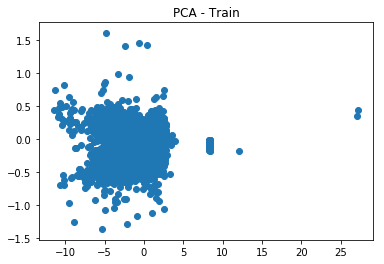

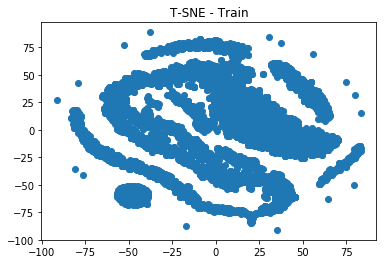

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA



embedding = Model(input = model.get_layer("user_input").input, output = model.get_layer("flattened_user_embedding").output)


Z = embedding.predict(users)
np.savetxt("user_embeddings.tsv", Z , delimiter="\t")

tsne = TSNE(n_components=2, random_state=0, verbose=1)
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(Z)
X_tsne_2d = tsne.fit_transform(Z)


plt.figure(1)
plt.title('PCA - Train')
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1])

plt.figure(2)
plt.title('T-SNE - Train')
plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1])

plt.show()

In [ ]:
embedding = Model(input = model.get_layer("positive_item_input").input, output = model.get_layer("flattened_item_embedding").output)
Z = embedding.predict(rests)
np.savetxt("restaurant_embeddings.tsv", Z , delimiter="\t")
tsne = TSNE(n_components=2, random_state=0, verbose=1)
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(Z)
X_tsne_2d = tsne.fit_transform(Z)


plt.figure(1)
plt.title('PCA - Train')
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1])

plt.figure(2)
plt.title('T-SNE - Train')
plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1])

plt.show()